In [13]:
import salem
import xarray as xr
from utils import constants as cnst
from utils import u_plot as uplot, u_darrays as uda, u_met
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [150]:
era_fsrfc = '/media/ck/Elements/Africa/WestAfrica/SWIFT/ERA5_15Sep_NowcastDay/ERA5_20210915_srfc.nc'
era_fpl = '/media/ck/Elements/Africa/WestAfrica/SWIFT/ERA5_15Sep_NowcastDay/ERA5_20210915_pl.nc'

In [151]:
srfco = xr.open_dataset(era_fsrfc)
plo = xr.open_dataset(era_fpl)
srfco = uda.flip_lat(srfco)
plo = uda.flip_lat(plo)

In [218]:
pl = plo.sel(time=(plo['time.hour']==21))
srfc = srfco.sel(time=(srfco['time.hour']==21))

mean = srfco.sel(time=(srfco['time.day']==15)&(srfco['time.hour']>=9)&(srfco['time.hour']<=13)).mean('time')
meanpl = plo.sel(time=(plo['time.day']==15)&(plo['time.hour']>=9)&(plo['time.hour']<=13)).mean('time')

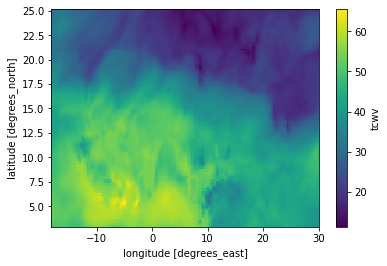

In [198]:
mean['tcwv'].plot()

In [263]:
import cartopy.feature as cfeature
import pandas as pd
def draw_map(ax, ds, levels, cmap, grad=None, clevels=[13,13.0001]):

    lat = ds['latitude']
    lon = ds['longitude']
    grad = np.gradient(ds.values, axis=0)
    plt.contourf(lon, lat, ds.values, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels)
    if grad is not None:
        plt.contourf(lon, lat, grad, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels)
        
    plt.colorbar()
    plt.contour(lon,lat,ds, transform=ccrs.PlateCarree(), levels=clevels, colors='k')
    
    #plt.contour(lon, lat, ds['rain']/100, transform=ccrs.PlateCarree(), cmap='jet')
    #plt.title(str(ds['time.month'].values)+'-'+str(ds['time.day'].values)+' '+str(ds['time.hour'].values).zfill(2)+'UTC')
    ax.coastlines()
    ax.add_feature(cfeature.RIVERS)
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

TypeError: Input z must be 2D, not 1D

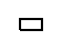

In [264]:
import ipdb
f = plt.figure(figsize=(15,4), dpi=200)
ds = mean['tcw']#-mean['cape']

for ids, p in enumerate(ds):
    ax = f.add_subplot(1,ds.values.shape[0], ids+1, projection=ccrs.PlateCarree())
    #ipdb.set_trace()
    draw_map(ax,p, levels=np.arange(20,70,5), cmap='RdBu')
    for h in range(10,14):
        srfch = srfco.sel(time=((srfco['time.hour']==h)&(srfco['time.day']==p['time.day']))).squeeze()
     #   ipdb.set_trace()
        #plt.contour(srfc.longitude,srfc.latitude,srfch['tcwv'], transform=ccrs.PlateCarree(), levels=[40,40.0001], colors='k')

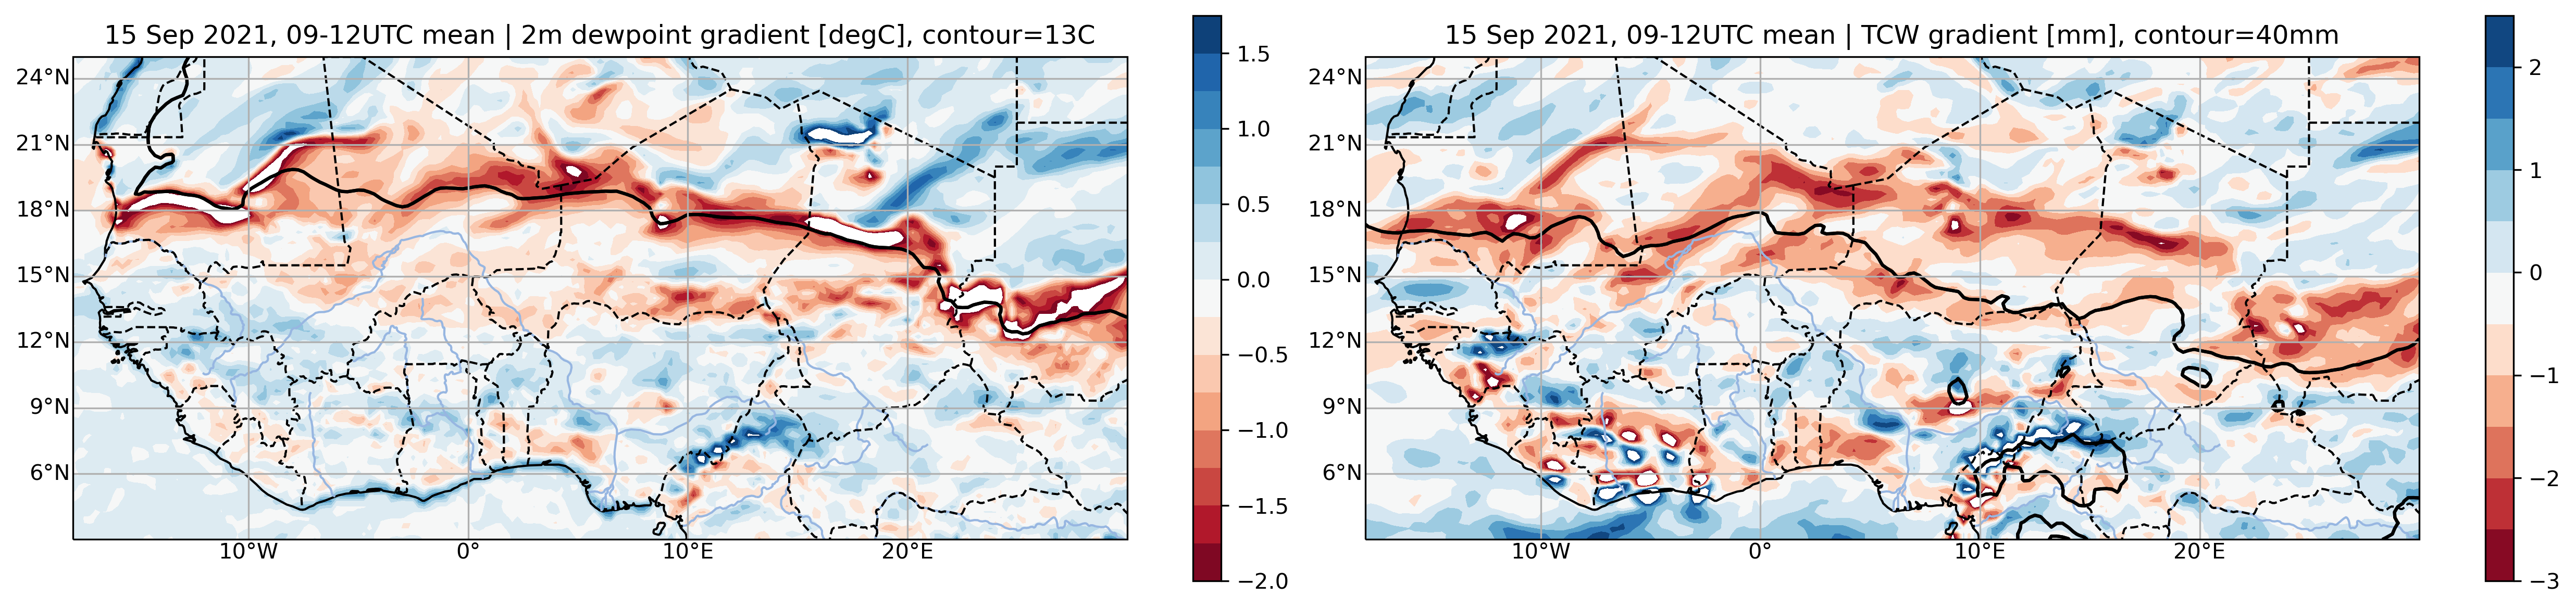

In [277]:
f = plt.figure(figsize=(17,4), dpi=300)
ds = mean['d2m']-273.15#-mean['cape']
ax = f.add_subplot(121, projection=ccrs.PlateCarree())

draw_map(ax,ds, levels=np.arange(-2,2,0.25), cmap='RdBu', grad=None)
plt.title('15 Sep 2021, 09-12UTC mean | 2m dewpoint gradient [degC], contour=13C')
#ipdb.set_trace()
ds = mean['tcw']
ax = f.add_subplot(122, projection=ccrs.PlateCarree())
    
draw_map(ax,ds, levels=np.arange(-3,3,0.5), cmap='RdBu', grad=True, clevels=[40,40.0001])
plt.title('15 Sep 2021, 09-12UTC mean | TCW gradient [mm], contour=40mm')
plt.tight_layout()
f.savefig('/media/ck/Elements/Africa/WestAfrica/SWIFT/ERA5_15Sep_NowcastDay/moistureVars_ITD_.jpg')

In [250]:
ds

<xarray.DataArray 'q' (latitude: 89, longitude: 193)>
array([[13.663195 , 13.622063 , 13.616864 , ..., 14.91833  , 14.79658  ,
        14.665948 ],
       [14.171317 , 14.053581 , 13.928147 , ..., 15.382094 , 15.299437 ,
        14.899837 ],
       [14.519388 , 14.654299 , 14.394018 , ..., 15.349585 , 15.072852 ,
        14.958803 ],
       ...,
       [ 8.488393 ,  8.390335 ,  8.230679 , ...,  6.7539597,  6.6458983,
         6.591803 ],
       [ 9.119054 ,  8.98355  ,  9.027051 , ...,  6.7587633,  6.5546856,
         6.493679 ],
       [ 9.595717 ,  9.42461  ,  9.550045 , ...,  6.770939 ,  6.5436296,
         6.4827547]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 29.5 29.75 30.0
  * latitude   (latitude) float32 3.0 3.25 3.5 3.75 ... 24.25 24.5 24.75 25.0
    level      int32 925